# ASSIGNMENT_3_Visual Exploration of Data


## Visualization Technique (20%)


- A narrative description of each visualization type in your dashboard 
- A discussion of how these visualizations complement each other and when each should be used 
- Dashboard-specific considerations like interactivity options 

<font size="3"> 

I am planning to use **dataframes**, **pivot tables** (or grouping the dataframes by a column), a **pie chart**, a couple of **bar graphs**, a **scatter plot** and a **box plot** to visualize Reported Chemical Data in the United States from the Environmental Protection Agency. Dataframes are a tabular representation of data. Since the data recieved will be in CSV format, transforming the data into dataframes will be the first step. Pivot tables are similar to dataframes, except the data pivots onto unique items in a specified column of the data. A pie chart shows the proportion of certain elements exsisting within a whole group. With pie charts, one can visualize how much of a component within a dataset there is. This may give me ideas for further exploration. Bar graphs allow the comparison of the values between discrete categories to be visualized. A bar graph will show the total amount of production, in pounds, that were reported and could be shown from the dataset. Lastly, a boxplot would show how much variation a dataset has, or even shed light on any outliers that may be present within.

Dataframes are clear. But they can be extremely long, with no way to comprehend without other visualizations. One can see what the values look like in their basic form, but it's hard to imagine what all the raw data means collectively. pandas.core.frame.DataFrame A pivot table is easier to look at. Its categories are ordered, helping to imagine the story the data could be telling. Bar graphs give you another perspective on the data that tabular dat just cannot provide. They let you compare a set of values directly with each other. Scatter plots, though similar, may also add to the story even further. They may be able to show a trend within the data. A box plot digs deeper into the data. It lets you see the variation of the dataset more clearly.

I would like my visualization to have hovering characteristics. Detailed information should be shown when the cursor hovers over various datapoints. Additionally, I would like to toggle between years in the dataset using a dropdown menu. This will allow us to seamlessly compare production volumes over a period of 4 years.

 </font>

## Visualization Library (25%) 
The dashboard framework and libraries you're using, and why they're suitable for this visualization. For instance, 

- who created it?
- Is it open source?
- How do you install it? 

A discussion of the general approach and limitations of this framework. For instance, Is it declarative or procedural? Does it integrate with Jupyter? Why did you decide to use this framework (especially if there are other options)?


<font size="3">

I will be using Python created by Guido van Rossum, and we will also be using a few additional libraries and modules to assist our data exploration. **urllib.request** is a python package that I wanted to use for automatically loading the data from any Notebook for opening and reading URLs. Another python tool that will be used is **zipfile**, a module that will help us extract files that we retrieve from the web. **os** is used to navigate our file system and create a list of files for our program to refer to. The dataset has multiple csv files to look at, so **pandas** from Wes McKinney will be used to read, parse, order and arrange the data as needed. Then we have **matplotlib**, **ipywidgets** and **IPython.display** to render figures for visualization and interactivity. In a Jupyter environment, these last three should already be included, and only need to be imported, if I'm not mistaken.

The framework used for this data exploration is open source. I am most familiar with the libraries being used, however at quite a novice level. This is the main reason for not using other options; to practice what I have learned about these tools so far before venturing into new territory already. Furthermore, using **seaborn** in a previous assignment proved to be simpler for me to use. While time is of the essence, I'm not here to take the easier route. Lastly, all of the tools in the shed integrate with well with Jupyter.
 </font>

In [1]:
from urllib.request import urlretrieve
import zipfile
import os
import numpy as np
import pandas as pd                                     # !pip install pandas
import matplotlib.pyplot as plt
from ipywidgets import Dropdown
import ipywidgets as widgets
from IPython.display import display, clear_output

- Above are all the import statements needed
    * **urllib** is for retrieving the data
    * **zipfile** is for extracting the data once we grab it from the web and place it in our current directory
    * that leads to **os** for control over the directory straight from the notebook
    * what would life without **pandas** be like?
    * **matplotlib** for eventually visualizing the data
    * and **numpy** for conveniently working with arrays from time to time. I also use np.nan for cleaning
    * **ipywidgets** and **IPython.display** for rendering figures and plots with interactivity

## Demonstration (50%) 
The dataset you picked and instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate multiple visualization types and interactive features working together. 
The quality of your demonstration. First demonstrate building basic dashboard components, then show how to implement interactivity and advanced features. This is the "meat" of the assignment. For reference you should have at least 4 graph types in your dashboard that work together to tell a cohesive story. 


## Access Chemical Data Reporting (CDR) Data

###### https://www.epa.gov/chemical-data-reporting/access-chemical-data-reporting-data

#### Here is the URL we need. The data is prepared, and all functions are located at the beginning for reference.

In [2]:
URL = 'https://www.epa.gov/system/files/other-files/2022-05/2020%20CDR%20Public%20CSV%20Data_0.zip'

In [3]:

def extract_fromZip(filename='2020 CDR Public CSV Data_0.zip'):
    '''
    retrieves zipfile from URL and extracts files from zip files if it exists, 
    otherwise retrieve data from URL as filename.

    parameters:
    -----------
    filename: zip file (optional)

    '''
    if not os.path.exists(filename):
        urlretrieve(URL, filename)
        dir_list = os.listdir()
        for file in dir_list:
            if file.endswith('.zip'):
                with zipfile.ZipFile(file) as f:
                    f.extractall()


def gB_func(dframe):
    '''
    useful for apply function from pandas

    '''
    return dframe


def create_pivot(df):
    '''
    Groups two column dataframe by its first column

    parameters:
    ----------
    pandas.core.frame.DataFrame (mandatory)

    returns:
    --------
    pivot table with sorted values

    '''
    
    cols = df.columns

    df = df.groupby(cols[0]).sum()
    return df.sort_values(cols[0])



def create_bar_sub(df, ax):
    '''
    create bar graph with title, axis labels and vertically rotated ticks

    parameters:
    ----------
    df: pandas.core.frame.DataFrame (mandatory)
    ax: axis of a given figure

    plots:
    ------
    matplotlib figure

    '''
    cols = df.columns

    ax.bar(df.index, df[cols[0]])
    ax.set_title(df.index.name + ' ' + cols[0], fontsize=20)
    ax.set_ylabel(cols[0], fontsize=16)
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)


def create_bar_(df, ax, bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']):
    '''
    creates a subplot bar graph

    Parameters:
    -----------
    df: pandas dataframe
    ax: axis of a given figure
    bar_colors: list of appropriate strings that represent specific colors
    '''
    ax.bar(df.columns, df.sum(), label=df.columns[:], color=bar_colors)
    ax.set_ylabel("PV (lbs)", size=16)
    ax.set_title('Production Volume Bar', size=20)
    ax.legend(title='Years', loc="best")


def create_scatter(df, x, y, ax):
    '''
    creates a sub-scatterplot

    Parameters:
    -----------
    df: pandas dataframe
    x, y: data positions for the x and y axis
    ax: axis of a given figure
    '''
    title = x.name + ' ' + 'scatter' + ' ' + y.name
    c = 'tab:olive'

    ax.scatter(x, y, marker='^', alpha=0.5, c=c)
    ax.set_title(title, size=20)
    ax.set_ylabel(y.name, fontsize=16)
    ax.tick_params(axis='y', labelrotation=90, labelsize=8)


def create_box(df, ax, plot_cols=[]):
    '''
    creates a sub-boxplot

    Parameters:
    -----------
    df: pandas dataframe
    ax: axis of a given figure
    plot_cols: list of plot columns to be
    '''
    plot_cols=[df['2019 PV'], df['2018 PV'], df['2017 PV'], df['2016 PV']]
    ax.boxplot(plot_cols, showmeans=True)
    ax.set_title('Production Volume Box', size=20)
    ax.set_xticks([1,2,3,4], ['2019 PV', '2018 PV', '2017 PV', '2016 PV'])
    ax.set_ylabel("PV (lbs)", fontsize=16)

In [4]:
# load the data
extract_fromZip()

csvList = []
for f in os.listdir():
    if f.endswith('.csv'):
        csvList.append(f)
# not completely necessary, but it is nice for me to see the filenames printed out
print(csvList)

['2020 CDR Consumer and Commercial Use Information.csv', '2020 CDR Industrial Processing and Use Information.csv', '2020 CDR Manufacture-Import Information.csv', '2020 CDR Nationally Aggregated Production Volumes.csv']


#### Below are all the original dataframes of the data retreived, originally in csv format, which is convenient.

In [5]:
# Consumer and Commercial Use Information
Con_CommUse = pd.read_csv(csvList[0], low_memory=False)

# Industrial Processing and Use Information
IndProc_Use = pd.read_csv(csvList[1], low_memory=False)

# Manufacture-Import Information
Mfg_Imp = pd.read_csv(csvList[2])

# Nationally Aggregated Production Volumes
NatAggPV = pd.read_csv(csvList[3])

Here are the columns I'm interested in from three similar dataframes. I will concatenate all of these so it is all in one place.

In [6]:
Columns_of_Interest = ['CHEMICAL ID','CHEMICAL ID TYPE', 'DOMESTIC PARENT COMPANY NAME', 
             'FOREIGN PARENT COMPANY NAME','SITE STATE', 'EPA FACILITY REGISTRY ID', 
             'ACTIVITY', '2019 PV', '2018 PV', '2017 PV', '2016 PV', 'PERCENT BYPRODUCT', 
             'WORKERS CODE', 'WORKERS', 'MAX CONC CODE','MAXIMUM CONCENTRATION', 'RECYCLED', 
             'PHYSICAL FORM(S)']

Con_Comm = Con_CommUse[Columns_of_Interest]
IndProc = IndProc_Use[Columns_of_Interest]
Mfg_Import = Mfg_Imp[Columns_of_Interest]

CCIP = pd.concat([Con_Comm, IndProc, Mfg_Import])

# length for reference of all dfs merged together
len(CCIP)

164984

In [7]:
# Before conversion of the production volume columns to integers, drop commas and join string numbers
CCIP['2019 PV'] = CCIP['2019 PV'].str.replace(',', '')
CCIP['2018 PV'] = CCIP['2018 PV'].str.replace(',', '')
CCIP['2017 PV'] = CCIP['2017 PV'].str.replace(',', '')
CCIP['2016 PV'] = CCIP['2016 PV'].str.replace(',', '')

#### CBI - Confidential Business Information

- "The EPA determines which data is protected as confidential business information." 
- For the purpose of exploration, data reported as 'CBI' has been excluded from the yearly PV for each chemical in the dataset. For more information, visit the link below :

###### https://www.epa.gov/ghgreporting/confidential-business-information-ghg-reporting#:~:text=EPA%20determines%20which%20data%20will,CFR%20part%202%2C%20subpart%20B

In [8]:
CCIP = CCIP.where(CCIP['2019 PV'] != 'CBI')
CCIP = CCIP.where(CCIP['2019 PV'] != 'NaN')

CCIP = CCIP.where(CCIP['2018 PV'] != 'CBI')
CCIP = CCIP.where(CCIP['2018 PV'] != 'NaN')

CCIP = CCIP.where(CCIP['2017 PV'] != 'CBI')
CCIP = CCIP.where(CCIP['2017 PV'] != 'NaN')

CCIP = CCIP.where(CCIP['2016 PV'] != 'CBI')
CCIP = CCIP.where(CCIP['2016 PV'] != 'NaN')

In [9]:
# finally, change type of Production Volume to 'float' so the data can be analyzed numerically
CCIP['2019 PV'] = CCIP['2019 PV'].astype('float')
CCIP['2018 PV'] = CCIP['2018 PV'].astype('float')
CCIP['2017 PV'] = CCIP['2017 PV'].astype('float')
CCIP['2016 PV'] = CCIP['2016 PV'].astype('float')

#### Create Variables

In [10]:
chemForms = CCIP[['PHYSICAL FORM(S)', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
site = CCIP[['SITE STATE', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
domestic_name = CCIP[['DOMESTIC PARENT COMPANY NAME', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
foreign_name = CCIP[['FOREIGN PARENT COMPANY NAME', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
chem = CCIP[['CHEMICAL ID', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
activity = CCIP[['ACTIVITY', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
byproduct = CCIP[['PERCENT BYPRODUCT', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
workers = CCIP[['WORKERS CODE', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
max_conc = CCIP[['MAXIMUM CONCENTRATION', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
recycled = CCIP[['RECYCLED', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
epa_id = CCIP[['EPA FACILITY REGISTRY ID', '2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()

# transform the data
years = CCIP[['2019 PV', '2018 PV', '2017 PV', '2016 PV']].dropna()
years['SUM'] = years.sum(axis=1)
years['log'] = np.log10(years['SUM'])
year_options = ['2019 PV', '2018 PV', '2017 PV', '2016 PV']

c:\Users\rjsoc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
grouped =  create_pivot(site)

def create_bar_chart(year):
    df = grouped.sort_values(by=year, ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.bar(df.index, df[year])
    plt.title(f"Production Volume by State ({year})", fontsize=16)
    plt.ylabel("Production Volume")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
widgets.interact(create_bar_chart, year=widgets.Dropdown(options=year_options, value='2019 PV', description='Year:'))

interactive(children=(Dropdown(description='Year:', options=('2019 PV', '2018 PV', '2017 PV', '2016 PV'), valu…

<function __main__.create_bar_chart(year)>

### First Exploration

I would like to see what type of chemicals are being produced, so I try to look at 'CHEMICAL ID TYPE' and 'CHEMICAL NAME'. This is from Nationally Aggregated csv file which was not combined with the other csv files.

In [13]:
chemNameTypes = NatAggPV[['CHEMICAL NAME', 'CHEMICAL ID TYPE', '2019 NATIONALLY AGGREGATED PV', '2018 NATIONALLY AGGREGATED PV', '2017 NATIONALLY AGGREGATED PV', '2016 NATIONALLY AGGREGATED PV']]
gB_chemType = chemNameTypes.groupby('CHEMICAL ID TYPE')
chemIDtypes = gB_chemType.apply(func=gB_func, include_groups=False) # note why include groups
# in the Jupyter Notebooks linked with Coursera, "include_groups=False" needs to be commented out. With VScode there is no issue...
# The VScode environment recommended I use "include_groups=False", because in the most recent pandas version, that will be the default.
chemIDtypes

CHEMICAL NAME  \
CHEMICAL ID TYPE                                                           
Accession Number 0     (Polyisobutenyl)dihydro-2,5-furandione esters ...   
                 1     (Polyisobutenyl)dihydro-2,5-furandione reactio...   
                 2     (Polyisobutenyl)dihydro-2,5-furandione reactio...   
                 3     (Polyisobutenyl)dihydro-2,5-furandione, polyhy...   
                 4     (Polyisobutenyl)dihydro-2,5-furandione, reacti...   
...                                                                  ...   
CASRN            8644               Zirconium, bis(nitrato-.kappa.O)oxo-   
                 8645  Zirconium, chloro hydroxy lactate oxo sodium c...   
                 8646                            Zirconium, dichlorooxo-   
                 8647        Zirconium, hydroxy lactate sodium complexes   
                 8648  Zirconium, tetrakis[2-[bis(2-hydroxyethyl)amin...   

                      2019 NATIONALLY AGGREGATED PV  \
CHEMICAL ID TYPE                                      
Accession Number 0               100,000 – <500,000   
                 1                       <1,000,000   
                 2        20,000,000 – <100,000,000   
                 3                       <1,000,000   
                 4          1,000,000 – <20,000,000   
...                                             ...   
CASRN            8644                    <1,000,000   
                 8645                             0   
                 8646       1,000,000 – <20,000,000   
                 8647                    <1,000,000   
                 8648                    <1,000,000   

                      2018 NATIONALLY AGGREGATED PV  \
CHEMICAL ID TYPE                                      
Accession Number 0          1,000,000 – <10,000,000   
                 1          1,000,000 – <20,000,000   
                 2          1,000,000 – <20,000,000   
                 3                       <1,000,000   
                 4                       <1,000,000   
...                                             ...   
CASRN            8644       1,000,000 – <20,000,000   
                 8645                    <1,000,000   
                 8646       1,000,000 – <20,000,000   
                 8647                    <1,000,000   
                 8648                    <1,000,000   

                      2017 NATIONALLY AGGREGATED PV  \
CHEMICAL ID TYPE                                      
Accession Number 0             500,000 – <1,000,000   
                 1          1,000,000 – <20,000,000   
                 2        20,000,000 – <100,000,000   
                 3                       <1,000,000   
                 4                       <1,000,000   
...                                             ...   
CASRN            8644                    <1,000,000   
                 8645                    <1,000,000   
                 8646       1,000,000 – <20,000,000   
                 8647                    <1,000,000   
                 8648                    <1,000,000   

                      2016 NATIONALLY AGGREGATED PV  
CHEMICAL ID TYPE                                     
Accession Number 0          1,000,000 – <20,000,000  
                 1          1,000,000 – <20,000,000  
                 2          1,000,000 – <20,000,000  
                 3                       <1,000,000  
                 4                       <1,000,000  
...                                             ...  
CASRN            8644                    <1,000,000  
                 8645                    <1,000,000  
                 8646       1,000,000 – <20,000,000  
                 8647                    <1,000,000  
                 8648                    <1,000,000  

[8649 rows x 5 columns]

#### CHEMICAL ID TYPE

* Identifies whether the chemical identification is expressed as a **Chemical Abstracts Service Registry Number 
(CASRN)** or 
* **Accession Number** (if the chemical's specific identity is on the confidential portion of the TSCA 
Inventory)

In [14]:
# after this, it prompted me to write a function to create a pivot table from any dataframe passed as an argument
chemTypes = NatAggPV[['CHEMICAL NAME', 'CHEMICAL ID TYPE']]
chemType_ct = chemTypes.groupby('CHEMICAL ID TYPE').count()
chemType_ct['perc'] = (chemType_ct['CHEMICAL NAME'] / len(chemTypes['CHEMICAL NAME'])) * 100
chemType_ct

,CHEMICAL NAME,perc
CHEMICAL ID TYPE,,
Accession Number,614,7.099087
CASRN,8035,92.900913


([<matplotlib.patches.Wedge at 0x27702390fe0>,
 [Text(-0.24329812554482638, 1.0727562733940894, 'Accession Number'),
  Text(0.24329815065449917, -1.0727562676992854, 'CASRN')],
 [Text(-0.1327080684789962, 0.5851397854876851, '7.1%'),
  Text(0.13270808217518135, -0.5851397823814283, '92.9%')])

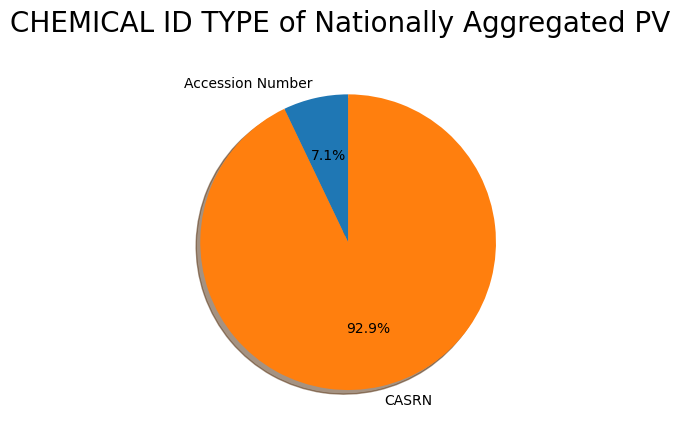

In [15]:
labels = 'Accession Number', 'CASRN'
sizes = chemType_ct['CHEMICAL NAME']

fig, ax = plt.subplots()
fig.suptitle('CHEMICAL ID TYPE of Nationally Aggregated PV', fontsize=20)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

##### ~7% of chemicals reported from 2020 CDR Nationally Aggregated Production Volumes' specific identity are on the confidential portion of the TSCA inventory. (Above)

In [16]:
# the data identifies the amount of workers in each company for each chemical in the data with a 'workers code'.
uniqueWorkers = CCIP['WORKERS'].dropna().unique()
uniqueWorkersCode = CCIP['WORKERS CODE'].dropna().unique()
d = {'WORKERS CODE': uniqueWorkersCode, 'WORKERS': uniqueWorkers}
workers_df = pd.DataFrame(data=d)
workers_df.sort_values(by='WORKERS CODE', ascending=True)

,WORKERS CODE,WORKERS
3,NKRA,Not Known or Reasonably Ascertainable
1,W1,< 10
4,W2,10 – 24
0,W3,25 – 49
5,W4,50 – 99
2,W5,100 – 499
8,W6,500 – 999
6,W7,"1,000 – 9,999"
7,W8,"10,000+"


In [17]:
'''
Another groupby to see how many different chemicals produced by companies according to their company size.
The size of the company does not tell us how many various chemicals they produce. A smaller company can produce
a wider variety of chemicals than a larger company. During the cleaning of the data, I learned that each row
of the combined dataframe is a unique chemical. So when we have a groupby().count(), we can get the total.
'''

workers_piv = CCIP[['WORKERS CODE', 'CHEMICAL ID']].dropna()
workers_piv = workers_piv.groupby('WORKERS CODE').count()
workers_piv = workers_piv.sort_values(by='WORKERS CODE')
workers_piv

,CHEMICAL ID
WORKERS CODE,
NKRA,5200
W1,20887
W2,8903
W3,8335
W4,8695
W5,13509
W6,2938
W7,4294
W8,84


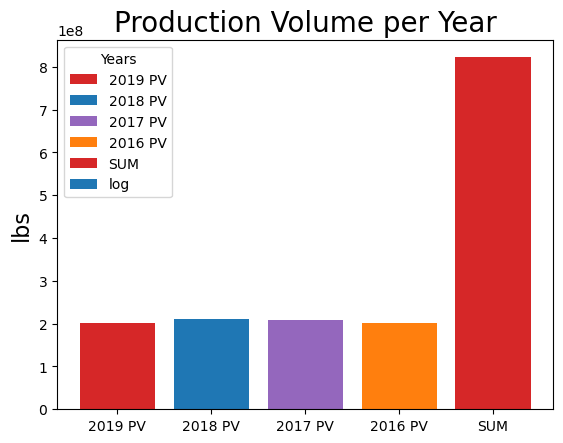

In [18]:
# a bar graph to show the total reported production volumes each year and the total across all four years.

bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']
plt.bar(years.columns, years.mean(), label=years.columns, color=bar_colors)
plt.ylabel('lbs', size=16)
plt.title('Production Volume per Year', size=20)
plt.legend(title='Years', loc="best")


## Interactive Dashboard

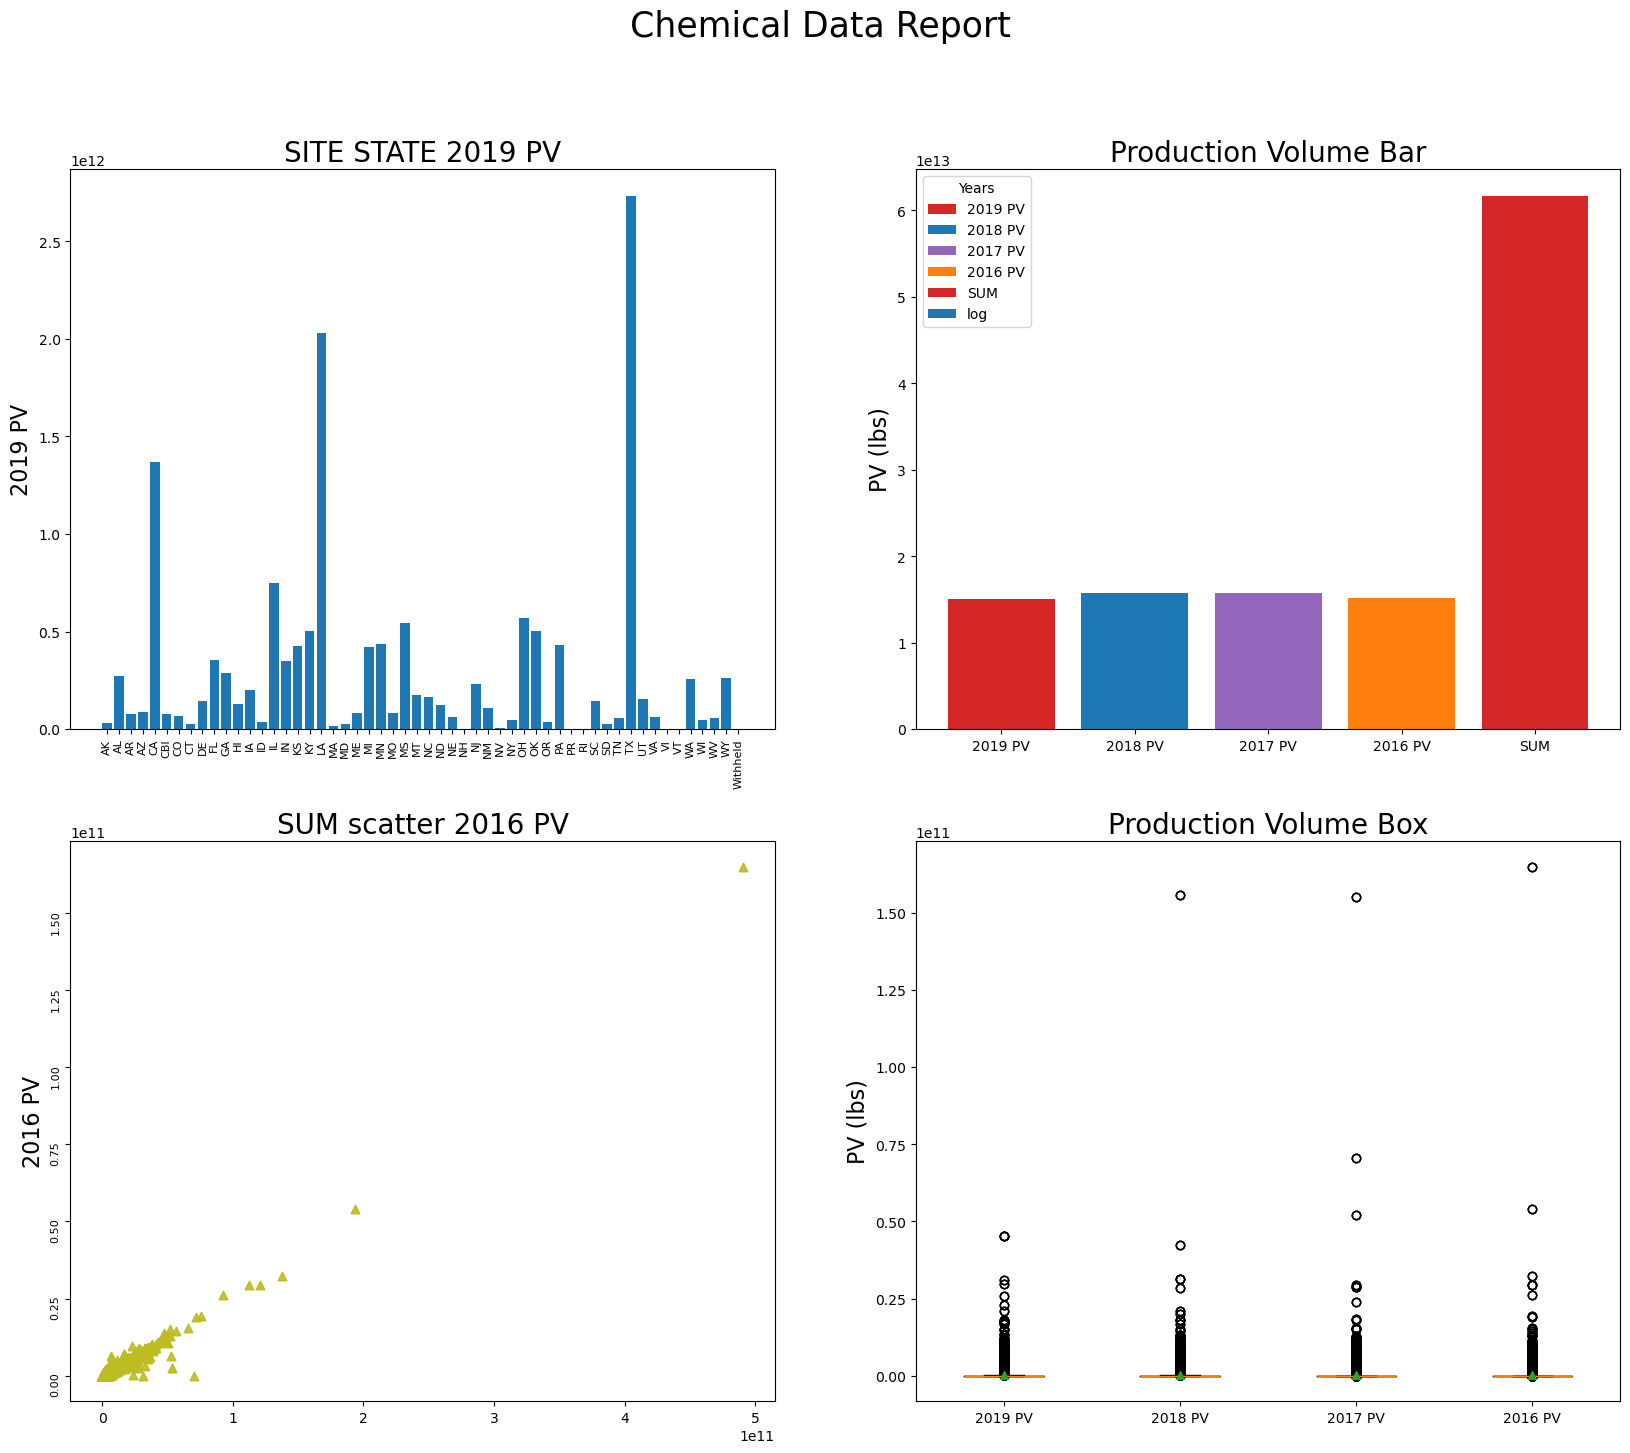

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Chemical Data Report', fontsize=25)

bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']

widgets.interact(create_bar_sub(create_pivot(site[['SITE STATE', year_options[0]]]), ax=ax1[0])) ##
create_bar_(years, ax=ax1[1])
create_scatter(years, years['SUM'], years[year_options[3]], ax=ax2[0])
create_box(years, ax=ax2[1])

# Trial & Error

I would like to add a dropdown menu to show the differences in the data for each year. In the scatterplot above, there could be options to create 2 dropdown menus, one for year and one for log or sum transformation.

In [20]:
grouped = site.groupby('SITE STATE').sum()

In [21]:
def create_bar_chart(year):
    df = grouped.sort_values(by=year, ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.bar(df.index, df[year])
    plt.title(f"Production Volume by State ({year})", fontsize=16)
    plt.ylabel("Production Volume")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    
widgets.interact(create_bar_chart, year=widgets.Dropdown(options=year_options, value='2019 PV', description='Year:'));

interactive(children=(Dropdown(description='Year:', options=('2019 PV', '2018 PV', '2017 PV', '2016 PV'), valu…

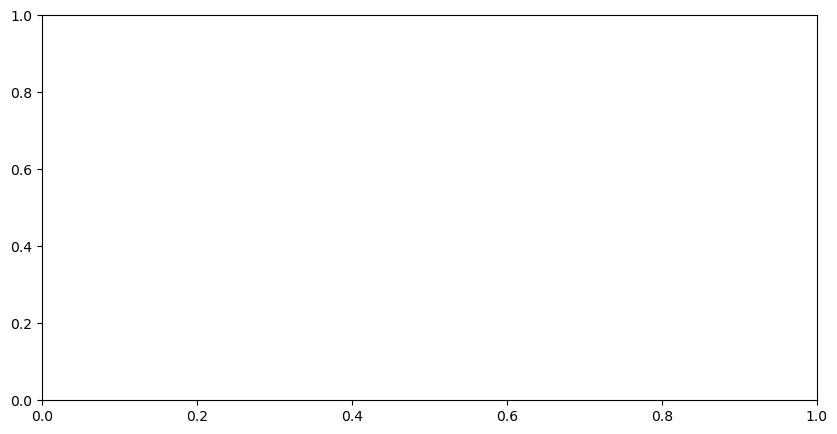

interactive(children=(Dropdown(description='Years', options=('2019 PV', '2018 PV', '2017 PV', '2016 PV'), valu…

<function __main__.create_bar_try(Years='2019 PV')>

In [22]:
fig1, ax1 = plt.subplots(figsize=(10, 5))

def create_bar_try(Years='2019 PV'):
    Dropdown(
    options=Years,         # List of choices
    value='2019 PV',       # Default selection
    description='Years:'
    )

    df = create_pivot(df[[df.columns[0], Years]])
    cols = df.columns
    
    ax.bar(df.index, df[cols[0]])
    ax.set_title(df.index.name + ' ' + cols[0], fontsize=20)
    ax.set_ylabel(cols[0], fontsize=16)
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)

year_options=['2019 PV', '2018 PV', '2017 PV', '2016 PV']
df = site.copy()
df = create_pivot(df)

widgets.interact(create_bar_try, Years=year_options)

In [23]:
create_pivot(site)

,2019 PV,2018 PV,2017 PV,2016 PV
SITE STATE,,,,
AK,2.970193e+10,3.099266e+10,2.885501e+10,2.984280e+10
AL,2.730840e+11,2.675083e+11,2.582305e+11,2.618922e+11
AR,7.583739e+10,7.477158e+10,7.346669e+10,6.834579e+10
AZ,8.960783e+10,9.207095e+10,9.051794e+10,9.238558e+10
CA,1.367447e+12,1.337453e+12,1.331042e+12,1.252205e+12
CBI,7.865088e+10,1.048678e+11,1.038620e+11,1.091769e+11
CO,6.574122e+10,6.858491e+10,6.586896e+10,6.903830e+10
CT,2.815527e+10,2.314652e+10,2.106904e+10,1.948922e+10
DE,1.436110e+11,1.585702e+11,1.422781e+11,1.412381e+11


In [24]:
site.columns[0]

'SITE STATE'

In [25]:
create_pivot(site[['SITE STATE', year_options[3]]])

,2016 PV
SITE STATE,
AK,2.984280e+10
AL,2.618922e+11
AR,6.834579e+10
AZ,9.238558e+10
CA,1.252205e+12
CBI,1.091769e+11
CO,6.903830e+10
CT,1.948922e+10
DE,1.412381e+11


## Requirements

In [26]:
# !pip freeze

In [27]:
# !pip install watermark

In [28]:
%load_ext watermark
%watermark -v -m -p ipywidgets,urllib,zipfile,os,pandas,matplotlib,numpy,IPython

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

ipywidgets: 8.1.5
urllib    : unknown
zipfile   : unknown
os        : unknown
pandas    : 2.2.2
matplotlib: 3.9.2
numpy     : 1.26.4
IPython   : 8.27.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

